<div style="border:solid orange 3px; padding: 16px">  
    <font size="4">  
        <p style="text-align: center;">
            <b> 3. Исследовательский анализ данных. Исследование объявлений о продаже квартир </b>
        </p> 
    </font>
</div>

## 0. Описание проекта 

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге за несколько лет. По каждой продаваемой квартире есть два вида данных. Первые — вносили сами пользователи при публикации объявлений, вторые — получены на основе картографических данных: расстояния до центра города, аэропорта, ближайшего парка и водоёма.

Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

## 1. Получение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime

path = 'C:/Users/pavel/Desktop/da/projects/datasets/'

\usepackage[hybrid]{markdown}

In [2]:
df = pd.read_csv(path + '03_real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)

#вывод первых 11 строк набора данных
df.head(11)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Описание данных:

- `airports_nearest` — расстояние до ближайшего аэропорта (м);
- `balcony` — количество балконов;
- `ceiling_height` — высота потолков (м);
- `cityCenters_nearest` — расстояние до центра города (м);
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
- `first_day_exposition` — дата публикации;
- `floor` — этаж;
- `floors_total` — всего этажей в доме;
- `is_apartment` — апартаменты (булев тип);
- `kitchen_area` — площадь кухни (м²);
- `last_price` — цена на момент снятия с публикации;
- `living_area` — жилая площадь (м²);
- `locality_name` — название населённого пункта;
- `open_plan` — свободная планировка (булев тип);
- `parks_around3000` — количество парков в радиусе 3 км;
- `parks_nearest` — расстояние до ближайшего парка (м);
- `ponds_around3000` — количество водоёмов в радиусе 3 км;
- `ponds_nearest` — расстояние до ближайшего водоёма (м);
- `rooms` — количество комнат;
- `studio` — квартира-студия (булев тип);
- `total_area` — общая площадь квартиры (м²);
- `total_images` — количество фотографий квартиры в объявлении.

In [3]:
# вывод информации о размере таблицы
df.shape

(23699, 22)

In [4]:
#вывод общей информации о таблице (тип данных в столбце, кол-во записей в столбце)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
# количество дубликатов
df.duplicated().sum()

0

Отсутствуют полные дубликаты.

## 2. Предобработка данных

### 2.1 Обработка пропусков

Есть пропуски в столбцах:

- `ceiling_height`      
- `floors_total`        
- `living_area`         
- `is_apartment`        
- `kitchen_area`        
- `balcony`             
- `locality_name`       
- `airports_nearest`    
- `cityCenters_nearest` 
- `parks_around3000`    
- `parks_nearest`       
- `ponds_around3000`    
- `ponds_nearest`      
- `days_exposition`.     

Заметим небольшое количество пропусков в столбцах `floors_total` (86) и `locality_name` (49), при этом мы не можем восстановить значения этих слобцов по значениям в других столбцах - удалим записи, для которых не указано количество этажей в доме или название населенного пункта.

In [6]:
df = df.dropna(subset=['floors_total','locality_name' ]).reset_index(drop = 'True')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null float64
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 12090 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around300

Пропуски в столбцах `ceiling_height`, `living_area`, `kitchen_area` можно объяснить отсутствием данных от пользователей при публикации объявления. 

Пропуски в столбце `days_exposition`, возможно, появились из-за того, что объявление ещё не было снято на момент получения данных.

Пропуски в столбце `is_apartment` заполним значениями False - обычно квартиры не являются апартаментами. В 2760 имеющихся записях всего 50 (1.8%) - апартаменты. 

In [8]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Приведем данные в столбце `floors_total` к целочисленному типу.

In [9]:
df['floors_total'] = df['floors_total'].astype('int')

In [10]:
# переименуем столбцы 'studio' и 'open_plan' в 'is_studio' и 'is_open_plan' соответственно
change_column_names_dict = {"studio": "is_studio", "open_plan": "is_open_plan"}
df = df.rename(columns = change_column_names_dict)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null int32
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
is_studio               23565 non-null bool
is_open_plan            23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 12090 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000  

---

Будем проводить исследование в предположении о том, что пропуски в столбце `days_exposition` соответствуют тому, что объявление было опубликовано, но не было снято на момент получения данных. Предположим, что если объявление не было снято, значит квартира не была продана, значит в анализе длительности продажи квартир не будем учитывать такие записи. Оставим пропуски без изменений.

In [12]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


---

Перейдем к обработке пропусков в столбцах 
- `ceiling_height`
- `living_area`
- `kitchen_area`

Сначала посмотрим, есть ли взаимосвязь между известными значениями. Выведем матрицу коээфициентов корреляции для набора признаков: 
- общая площадь;
- количество комнат;
- высота потолков;
- общее количество этажей;
- жилая площадь; 
- этаж;
- площадь кухни.

In [13]:
df_attributes = df[['total_area','rooms', 'ceiling_height', 'floors_total', \
                    'living_area', 'floor', 'kitchen_area']]

df_attributes.head()

,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area
0,108.0,3,2.70,16,51.0,8,25.0
1,40.4,1,NaN,11,18.6,1,11.0
2,56.0,2,NaN,5,34.3,4,8.3
3,159.0,3,NaN,14,NaN,9,NaN
4,100.0,2,3.03,14,32.0,13,41.0


In [14]:
# числовые характеристики распределения признаков
df_attributes.describe().round(2)

,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area
count,23565.00,23565.00,14481.00,23565.00,21700.00,23565.00,21343.00
mean,60.32,2.07,2.77,10.68,34.45,5.88,10.56
std,35.66,1.08,1.26,6.59,22.05,4.87,5.90
min,12.00,0.00,1.00,1.00,2.00,1.00,1.30
25%,40.00,1.00,2.51,5.00,18.60,2.00,7.00
50%,52.00,2.00,2.65,9.00,30.00,4.00,9.10
75%,69.70,3.00,2.80,16.00,42.30,8.00,12.00
max,900.00,19.00,100.00,60.00,409.70,33.00,112.00


In [15]:
# матрица коэффициентов корреляции Пирсона между парами признаков
# метод .corr не учитывает (исключает из расчета) значения Null и NaN
df_attributes.corr().round(3)

,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area
total_area,1.000,0.759,0.095,-0.075,0.940,-0.024,0.609
rooms,0.759,1.000,0.054,-0.228,0.846,-0.151,0.270
ceiling_height,0.095,0.054,1.000,-0.029,0.091,-0.012,0.088
floors_total,-0.075,-0.228,-0.029,1.000,-0.169,0.678,0.165
living_area,0.940,0.846,0.091,-0.169,1.000,-0.097,0.429
floor,-0.024,-0.151,-0.012,0.678,-0.097,1.000,0.137
kitchen_area,0.609,0.270,0.088,0.165,0.429,0.137,1.000


Относительно высокая взаимосвязь (к. корреляции > 0.5) есть у данных в столбцах 
- `total_area` - `rooms` (0.76);
- `total_area` - `living_area` (0.94);
- `total_area` - `kitchen_area` (0.61);
- `living_area` - `rooms` (0.85).

### 2.2 Расчет неизвестных значений жилой площади

Начнем с пары признаков с самым большим коэффициентом - `total_area` - `living_area` (0.94). Построим для них диаграмму рассеяния вида hexbin. В этом случае пространство графика поделено на шестиугольные области, а интенсивность цвета означает количество записей в каждой области.

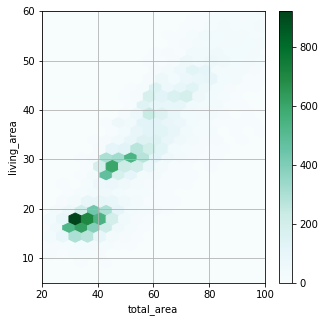

In [16]:
df_attributes.plot(x='total_area', xlim=(20, 100),\
                    y='living_area', ylim=(5, 60),\
                    kind='hexbin', gridsize=200, figsize=(5, 5),\
                    sharex=False, grid=True)
plt.show() 

Зависимость жилой площади от общей похожа на линейную, построим линию по двум точкам (32; 18) и (45; 28):

\begin{equation}
L = -6.615 + 0.769*T
\end{equation}

где $L$ - living area, $T$ - total area.

Прроверим найденные коэффициенты. Используем класс `LinearRegression` из библиотеки `scklearn`. Ограничим жилую площадь для нахождения коэффициентов линейной зависимости.

count    23565.00
mean        60.32
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64


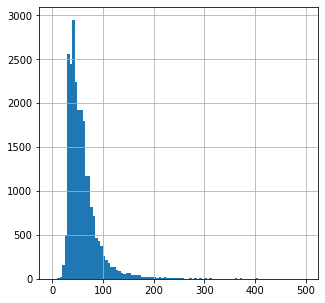

In [17]:
# числовые характеристики распределения общей площади
print(df_attributes['total_area'].describe().round(2))

# гистограмма распределения общей площади
df_attributes['total_area'].hist(bins = 100, range = (0,500), figsize = (5,5))
plt.show() 

Для нахождения зависимости ограничимся значениями общей площади до 300 кв.м.

In [18]:
# передаем нужный срез данных - столбцы (без пропусков) 
# с общей и жилой площадью для квартир с общей площадью до 300 кв.м
data = df_attributes.dropna(subset=['total_area','living_area'])\
                    .reset_index(drop = 'True')

x = data.query('total_area < 300')['total_area']
y = data.query('total_area < 300')['living_area']

# приведем к нужному для класса LinearRegression виду
x = np.array(x).reshape((-1,1))
y = np.array(y)

In [19]:
# построение модели линейной регрессии
try: 
    model = LinearRegression().fit(x, y)
except:
    model = LinearRegression().fit(x, y)

In [20]:
# вывод к. детерминации, значения y при х=0, к. наклона прямой
print('coefficient of determination:', model.score(x, y).round(3))
print('intercept:', model.intercept_.round(3))
print('slope:', model.coef_.round(3))

coefficient of determination: 0.873
intercept: -2.319
slope: [0.613]


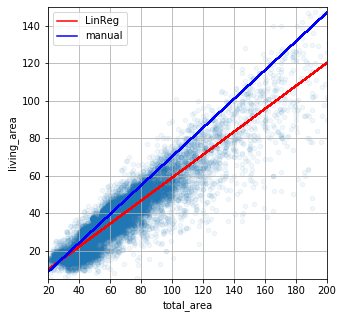

In [21]:
# выведем на общем графике диаграмму рассеяния 
# и две прямые: с коэфициентами из класса LinearRegression (красная)
# и с коэффициентами, найденными вручную (синяя)
ax = plt.axes()

plt.plot(x, model.intercept_ + model.coef_*x, color = 'red', label = 'LinReg')
plt.plot(x, -6.615 + 0.769*x, color = 'blue', label = 'manual')

df_attributes.plot(x='total_area', xlim=(20, 200),\
                    y='living_area', ylim=(5, 150),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .06, ax = ax)
plt.legend()
plt.show() 

Видим, что и подобранные вручную коэффициенты и вычисленные по модели линейной регрессии подходят не очень хорошо. На диаграмме рассеяния видны области скопления точек. Предположим, что эти области соответствуют квартирам с одинаковым количеством комнат. Попробуем разделить квартиры по количеству комнат (1, 2, 3, >3), и для каждого типа найти свои коэффициенты.

In [22]:
# 1 комнатные квартиры
x1 = np.array(data.query('total_area < 300 and rooms == 1')['total_area']).reshape((-1,1))
y1 = np.array(data.query('total_area < 300 and rooms == 1')['living_area'])
try: 
    model = LinearRegression().fit(x1, y1)
except:
    model = LinearRegression().fit(x1, y1)
    
score1 = model.score(x1, y1)
intercept1 = model.intercept_
coef1 = model.coef_

# 2-х комнатные квартиры
x2 = np.array(data.query('total_area < 300 and rooms == 2')['total_area']).reshape((-1,1))
y2 = np.array(data.query('total_area < 300 and rooms == 2')['living_area'])
try: 
    model = LinearRegression().fit(x2, y2)
except:
    model = LinearRegression().fit(x2, y2)
    
score2 = model.score(x2, y2)
intercept2 = model.intercept_
coef2 = model.coef_

# 3-х комнатные квартиры
x3 = np.array(data.query('total_area < 300 and rooms == 3')['total_area']).reshape((-1,1))
y3 = np.array(data.query('total_area < 300 and rooms == 3')['living_area'])
try: 
    model = LinearRegression().fit(x3, y3)
except:
    model = LinearRegression().fit(x3, y3)

score3 = model.score(x3, y3)
intercept3 = model.intercept_
coef3 = model.coef_

# 4-х и более комнатные квартиры
x4 = np.array(data.query('total_area < 300 and rooms > 3')['total_area']).reshape((-1,1))
y4 = np.array(data.query('total_area < 300 and rooms > 3')['living_area'])
try: 
    model = LinearRegression().fit(x4, y4)
except:
    model = LinearRegression().fit(x4, y4)
    
score4 = model.score(x4, y4)
intercept4 = model.intercept_
coef4 = model.coef_

1 ком.:  0.269 8.86 0.241
2 ком.:  0.51 12.8 0.34
3 ком.:  0.655 15.9 0.407
>3 ком.:  0.835 7.31 0.579


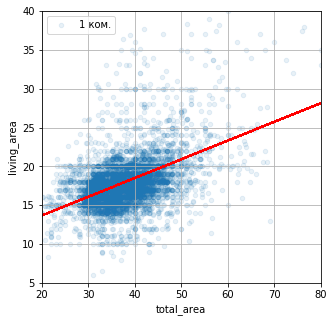

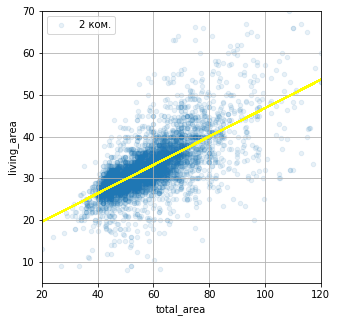

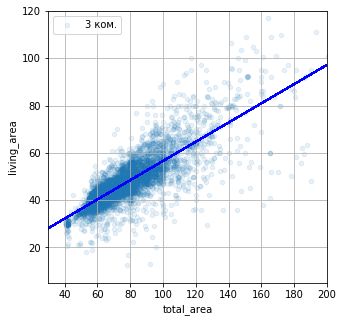

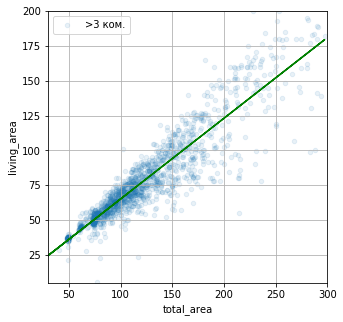

In [23]:
ax = plt.axes()
plt.plot(x, intercept1 + coef1*x, color = 'red')
data.query('total_area < 300 and rooms == 1').plot(x='total_area', xlim=(20, 80),\
                    y='living_area', ylim=(5, 40),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .1, ax = ax, label = '1 ком.')

data.query('total_area < 300 and rooms == 2').plot(x='total_area', xlim=(20, 120),\
                    y='living_area', ylim=(5, 70),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .1, label = '2 ком.')
plt.plot(x, intercept2 + coef2*x, color = 'yellow')


data.query('total_area < 300 and rooms == 3').plot(x='total_area', xlim=(30, 200),\
                    y='living_area', ylim=(5, 120),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .1, label = '3 ком.')
plt.plot(x, intercept3 + coef3*x, color = 'blue')


data.query('total_area < 300 and rooms > 3').plot(x='total_area', xlim=(30, 300),\
                    y='living_area', ylim=(5, 200),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .1, label = '>3 ком.')
plt.plot(x, intercept4 + coef4*x, color = 'green')

print('1 ком.: ','{:.3}'.format(score1), '{:.3}'.format(intercept1), '{:.3}'.format(coef1[0]))
print('2 ком.: ','{:.3}'.format(score2), '{:.3}'.format(intercept2), '{:.3}'.format(coef2[0]))
print('3 ком.: ','{:.3}'.format(score3), '{:.3}'.format(intercept3), '{:.3}'.format(coef3[0]))
print('>3 ком.: ','{:.3}'.format(score4), '{:.3}'.format(intercept4), '{:.3}'.format(coef4[0]))

Коэффициенты детерминации и графики для 1- и 2-х комнатных квартир, показывают, что зависимость жилой площади от общей не имеет ярко выраженный линейный вид. Но за неимением лучших вариантов, вычислим пропущенные значения в столбце `living_area` по значениям в столбце `total_area`.

In [24]:
# зададим функцию для расчета неизвестной жилой площади 
# по известным значениям общей площади
def living_area_calc(row):
    total_area = row['total_area']
    living_area = row['living_area']
    rooms = row['rooms']
    if rooms == 1:
        if pd.isna(living_area):
            return (intercept1 + coef1[0]*total_area)
        else:
            return living_area
    if rooms == 2:
        if pd.isna(living_area):
            return (intercept2 + coef2[0]*total_area)
        else:
            return living_area
    if rooms == 3:
        if pd.isna(living_area):
            return (intercept3 + coef3[0]*total_area)
        else:
            return living_area        
    if pd.isna(living_area):
        return (intercept4 + coef4[0]*total_area)
    return living_area        

In [25]:
# применим функцию к каждой строке 
df['living_area'] = df.apply(living_area_calc, axis = 1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null int32
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
is_studio               23565 non-null bool
is_open_plan            23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 12090 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000  

In [27]:
# cравним показатели распределения в столбце 'living_area' для исходных данных 
print('Исходные данные:')
print(df_attributes['living_area'].describe().round(3))
print()

# и для всех данных после заполнения пропусков 
print('Данные после заполнения:')
print(df['living_area'].describe().round(3))

Исходные данные:
count    21700.000
mean        34.455
std         22.045
min          2.000
25%         18.600
50%         30.000
75%         42.300
max        409.700
Name: living_area, dtype: float64

Данные после заполнения:
count    23565.000
mean        34.567
std         22.429
min          2.000
25%         18.620
50%         30.000
75%         42.300
max        409.700
Name: living_area, dtype: float64


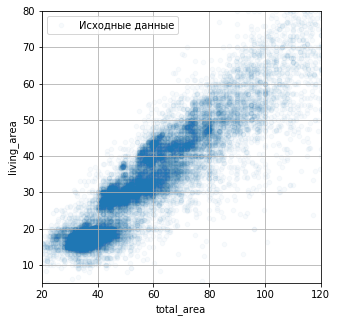

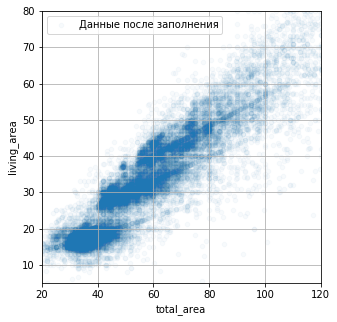

In [28]:
# выведем 2 диаграммы рассеяния 'living_area' - 'total_area'
# для исходных данных 
df_attributes.plot(x='total_area', xlim=(20, 120),\
                    y = 'living_area', ylim=(5, 80),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .03, label = 'Исходные данные')

# и для всех данных вместе с найденными по линейной зависимости
df.plot(x='total_area', xlim=(20, 120),\
          y = 'living_area', ylim=(5, 80),\
          kind='scatter', figsize=(5, 5),\
          sharex=False, grid=True, alpha = .03, label = 'Данные после заполнения')

plt.show() 

Видно, что значений стало больше, и распределены они примерно в тех же областях, что и известные записи. Все новые значения жилой площади лежат на отдельных прямых, соответствующих количеству комнат. 

Судя по числовым характеристикам распределения, набор данных изменился незначительно.

### 2.3 Расчет неизвестных значений площади кухни

Перейдем к заполнению площади кухни.

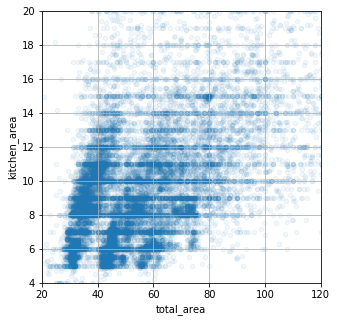

In [29]:
# диаграмма распределения для пар значений 'kitchen_area' - 'total_area'
df_attributes.plot(x='total_area', xlim=(20, 120),\
                   y='kitchen_area', ylim=(4, 20),\
                   kind='scatter', figsize=(5, 5),\
                   grid=True,alpha = 0.06)
plt.show()

На диаграмме рассеяния также видим области скопления точек, которые могут быть связаны с количеством комнат в квартире.

Повторим шаги, которые были сделаны при заполнении жилой площади:
- разделим квартиры на 4 типа (1-, 2-х, 3-х, 4-х и более комнатные)
- для каждого типа найдём коэффициенты линейной зависимости площади кухни от общей площади
- заполним пропуски расчетными значениями.

In [30]:
# передаем нужный срез данных - столбцы (без пропусков) 
# с общей площадью и площадью кухни для квартир с общей площадью до 300 кв.м
data = df_attributes.dropna(subset=['total_area','kitchen_area' ])\
                    .reset_index(drop = 'True')

1 ком.:  0.465 -2.05 0.307
2 ком.:  0.521 -5.85 0.284
3 ком.:  0.488 -5.24 0.213
>3 ком.:  0.423 0.611 0.116


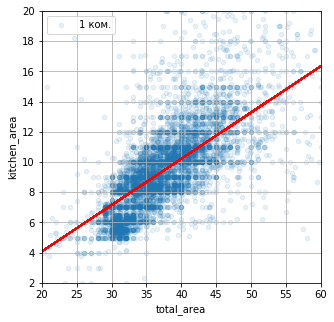

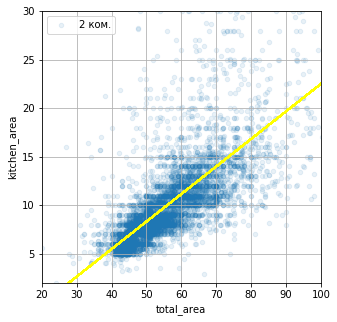

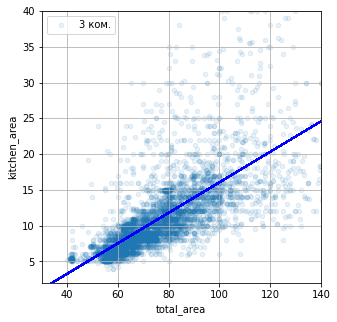

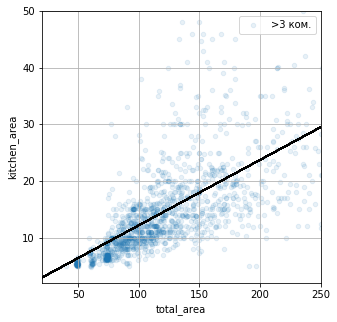

In [31]:
# 1 комнатные квартиры
x1 = np.array(data.query('total_area < 300 and rooms == 1')['total_area']).reshape((-1,1))
y1 = np.array(data.query('total_area < 300 and rooms == 1')['kitchen_area'])
try: 
    model = LinearRegression().fit(x1, y1)
except:
    model = LinearRegression().fit(x1, y1)
score1 = model.score(x1, y1)
intercept1 = model.intercept_
coef1 = model.coef_

# 2-х комнатные квартиры
x2 = np.array(data.query('total_area < 300 and rooms == 2')['total_area']).reshape((-1,1))
y2 = np.array(data.query('total_area < 300 and rooms == 2')['kitchen_area'])
try: 
    model = LinearRegression().fit(x2, y2)
except:
    model = LinearRegression().fit(x2, y2)
score2 = model.score(x2, y2)
intercept2 = model.intercept_
coef2 = model.coef_

# 3-х комнатные квартиры
x3 = np.array(data.query('total_area < 300 and rooms == 3')['total_area']).reshape((-1,1))
y3 = np.array(data.query('total_area < 300 and rooms == 3')['kitchen_area'])
try: 
    model = LinearRegression().fit(x3, y3)
except:
    model = LinearRegression().fit(x3, y3)
score3 = model.score(x3, y3)
intercept3 = model.intercept_
coef3 = model.coef_

# 4-х и более комнатные квартиры
x4 = np.array(data.query('total_area < 300 and rooms > 3')['total_area']).reshape((-1,1))
y4 = np.array(data.query('total_area < 300 and rooms > 3')['kitchen_area'])
try: 
    model = LinearRegression().fit(x4, y4)
except:
    model = LinearRegression().fit(x4, y4)
score4 = model.score(x4, y4)
intercept4 = model.intercept_
coef4 = model.coef_

ax = plt.axes()

data.query('total_area < 300 and rooms == 1').plot(x='total_area', xlim=(20, 60),\
                    y='kitchen_area', ylim=(2, 20),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .1, ax = ax, label = '1 ком.')
plt.plot(x, intercept1 + coef1*x, color = 'red')

data.query('total_area < 300 and rooms == 2').plot(x='total_area', xlim=(20, 100),\
                    y='kitchen_area', ylim=(2, 30),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .1, label = '2 ком.')
plt.plot(x, intercept2 + coef2*x, color = 'yellow')


data.query('total_area < 300 and rooms == 3').plot(x='total_area', xlim=(30, 140),\
                    y='kitchen_area', ylim=(2, 40),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .1, label = '3 ком.')
plt.plot(x, intercept3 + coef3*x, color = 'blue')


data.query('total_area < 300 and rooms > 3').plot(x='total_area', xlim=(20, 250),\
                    y='kitchen_area', ylim=(2, 50),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .1, label = '>3 ком.')
plt.plot(x, intercept4 + coef4*x, color = 'black')

print('1 ком.: ','{:.3}'.format(score1), '{:.3}'.format(intercept1), '{:.3}'.format(coef1[0]))
print('2 ком.: ','{:.3}'.format(score2), '{:.3}'.format(intercept2), '{:.3}'.format(coef2[0]))
print('3 ком.: ','{:.3}'.format(score3), '{:.3}'.format(intercept3), '{:.3}'.format(coef3[0]))
print('>3 ком.: ','{:.3}'.format(score4), '{:.3}'.format(intercept4), '{:.3}'.format(coef4[0]))

# зададим функцию для расчета площади кухни по известным значениям общей площади
def kitchen_area_calc(row):
    total_area = row['total_area']
    kitchen_area = row['kitchen_area']
    rooms = row['rooms']
    if rooms == 1:
        if pd.isna(kitchen_area):
            return (intercept1 + coef1[0]*total_area)
        else:
            return kitchen_area
    if rooms == 2:
        if pd.isna(kitchen_area):
            return (intercept2 + coef2[0]*total_area)
        else:
            return kitchen_area
    if rooms == 3:
        if pd.isna(kitchen_area):
            return (intercept3 + coef3[0]*total_area)
        else:
            return kitchen_area        
    if pd.isna(kitchen_area):
        return (intercept4 + coef4[0]*total_area)
    return kitchen_area        
    
# применим функцию к каждой строке 
df['kitchen_area'] = df.apply(kitchen_area_calc, axis = 1)

In [32]:
# cравним показатели распределения в столбце 'kitchen_area' для исходных данных 
print('Исходные данные:')
print(df_attributes['kitchen_area'].describe().round(3))
print()

# и для всех данных после заполнения пропусков 
print('Данные после заполнения:')
print(df['kitchen_area'].describe().round(3))

Исходные данные:
count    21343.000
mean        10.561
std          5.901
min          1.300
25%          7.000
50%          9.100
75%         12.000
max        112.000
Name: kitchen_area, dtype: float64

Данные после заполнения:
count    23565.000
mean        10.498
std          5.933
min          1.300
25%          7.000
50%          9.100
75%         12.000
max        149.522
Name: kitchen_area, dtype: float64


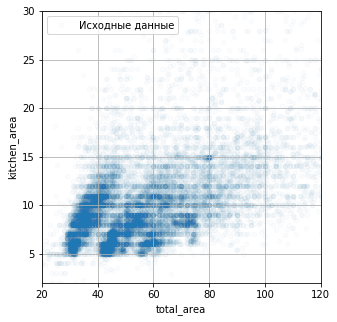

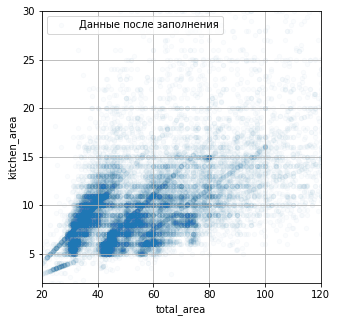

In [33]:
# построим диаграммы рассеяния 'kitchen_area' - 'total_area'
# для исходных данных 
df_attributes.plot(x='total_area', xlim=(20, 120),\
                    y = 'kitchen_area', ylim=(2, 30),\
                    kind='scatter', figsize=(5, 5),\
                    sharex=False, grid=True, alpha = .02, label = 'Исходные данные')
plt.legend(loc='upper left')

# и для всех данных после заполнения пропусков 
df.plot(x='total_area', xlim=(20, 120),\
          y = 'kitchen_area', ylim=(2, 30),\
          kind='scatter', figsize=(5, 5),\
          sharex=False, grid=True, alpha = .02, label = 'Данные после заполнения')

plt.legend(loc='upper left')
plt.show() 

Видно, что значений стало больше, и распределены они примерно в тех же областях, что и известные записи. Все новые значения площади кухни лежат на отдельных прямых, соответствующих количеству комнат. 

Судя по числовым характеристикам распределения, набор данных изменился незначительно.

### 2.4 Заполнение неизвестных значений высоты потолков

Рассмотрим данные в столбце `ceiling_height`.

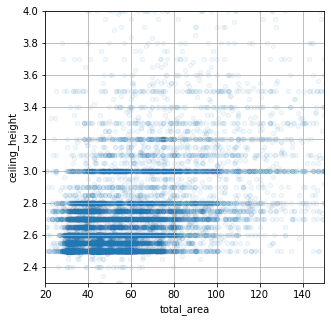

In [34]:
df.plot(x='total_area', xlim=(20, 150),\
                    y='ceiling_height', ylim=(2.3, 4),\
                    kind='scatter', figsize=(5, 5),\
                    grid=True,alpha = 0.06)
plt.show() 

Судя по этой диаграмме и по коэффициентам корреляции с другими столбцами, данные в столбце `ceiling_height` не связаны со значениями в других столбцах явным образом. Обычно высота потолка - величина, которая изменяется дискретно. Заполним пропуски не средним значением, а самым часто встречающимся.

In [35]:
df['ceiling_height'].value_counts().head()

2.5    3515
2.6    1645
2.7    1571
3.0    1108
2.8     988
Name: ceiling_height, dtype: int64

In [36]:
df[df['ceiling_height'].notna()]['ceiling_height'].mode().sum()

2.5

In [37]:
df['ceiling_height'] = df['ceiling_height']\
                       .where(df['ceiling_height'].notna(),
                              df[df['ceiling_height'].notna()]['ceiling_height'].mode().sum())

In [38]:
df['ceiling_height'].value_counts().head()

2.5    12599
2.6     1645
2.7     1571
3.0     1108
2.8      988
Name: ceiling_height, dtype: int64

Пропуски обработаны: заполнены характерными или средними значениями, или оставлены без изменений, в случае если данные невозможно восстановить. 

### 2.5 Добавление новых показателей
Для проведения более подробного исследования добавим новые характеристики объявлений:
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- категория этажа, на котором расположена квартира (первый, последний, другой);
- отношение жилой площади к общей и отношение площади кухни к общей площади.

In [39]:
# добавим столбец с ценой квадратного метра
df['sqmeter_price'] = df['last_price']/df['total_area']

In [40]:
# переведем строку с датой в формат даты
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [41]:
# добавим столбцы с данными о дате публикации объявления 
# +1 ко дню недели, чтобы привести в более привычный вид 1-7 вместо 0-6
df['weekday_of_exposition'] = df['first_day_exposition'].dt.weekday + 1
df['month_of_exposition'] = df['first_day_exposition'].dt.month
df['year_of_exposition'] = df['first_day_exposition'].dt.year

In [42]:
# добавим столбец с категорий этажа (первый/ последний/ другой)
# зададим функцию для определения и записи категории этажа
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'        
        
# применим функцию к каждой строке 
df['floor_type'] = df.apply(floor_type, axis = 1)

In [43]:
# добавим столбец с соотношением жилой площади к общей
df['living_total_ratio'] = df['living_area']/df['total_area']

In [44]:
# добавим столбец с соотношением площади кухни к общей
df['kitchen_total_ratio'] = df['kitchen_area']/df['total_area']

Изменим порядок столбцов в датасете.

In [45]:
df = df[['locality_name', 'rooms', 'sqmeter_price', 'last_price', 'total_area', 'living_area', 'kitchen_area',
             'floor', 'floors_total', 'floor_type', 'ceiling_height', 'is_apartment', 'is_studio', 'is_open_plan', 
             'balcony', 'living_total_ratio', 'kitchen_total_ratio', 'total_images', 'days_exposition', 
             'weekday_of_exposition', 'month_of_exposition', 'year_of_exposition','first_day_exposition', 
             'cityCenters_nearest','airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000',  
             'ponds_nearest']]

In [46]:
df.head()

,locality_name,rooms,sqmeter_price,last_price,total_area,living_area,kitchen_area,floor,floors_total,floor_type,ceiling_height,is_apartment,is_studio,is_open_plan,balcony,living_total_ratio,kitchen_total_ratio,total_images,days_exposition,weekday_of_exposition,month_of_exposition,year_of_exposition,first_day_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,Санкт-Петербург,3,120370.370370,13000000.0,108.0,51.000000,25.000000,8,16,другой,2.70,False,False,False,NaN,0.472222,0.231481,20,NaN,4,3,2019,2019-03-07,16028.0,18863.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,1,82920.792079,3350000.0,40.4,18.600000,11.000000,1,11,первый,2.50,False,False,False,2.0,0.460396,0.272277,7,81.0,2,12,2018,2018-12-04,18603.0,12817.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,2,92785.714286,5196000.0,56.0,34.300000,8.300000,4,5,другой,2.50,False,False,False,0.0,0.612500,0.148214,10,558.0,4,8,2015,2015-08-20,13933.0,21741.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,3,408176.100629,64900000.0,159.0,80.592663,28.626866,9,14,другой,2.50,False,False,False,0.0,0.506872,0.180043,0,424.0,5,7,2015,2015-07-24,6800.0,28098.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,2,100000.000000,10000000.0,100.0,32.000000,41.000000,13,14,другой,3.03,False,False,False,NaN,0.320000,0.410000,2,121.0,2,6,2018,2018-06-19,8098.0,31856.0,2.0,112.0,1.0,48.0


## 3. Исследовательский анализ данных 

### 3.1 Параметры типичных квартир
Построим гистограммы и выведем числовые характеристики распределения для столбцов `last_price`, `total_area`, `days_exposition`, `rooms`, `sqmeter_price`.

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

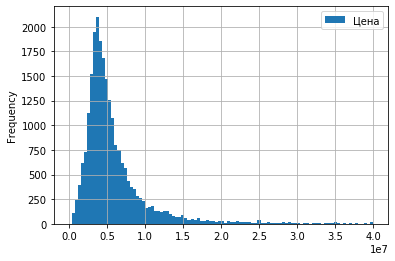

In [47]:
# распределение общей стоимости
df['last_price'].plot(kind = 'hist', range = (0,40e6), bins = 100, label = 'Цена', legend=True, grid = True)
df['last_price'].describe()

count      23565.00
mean       99405.84
std        50389.43
min          111.83
25%        76566.13
50%        95000.00
75%       114213.20
max      1907500.00
Name: sqmeter_price, dtype: float64

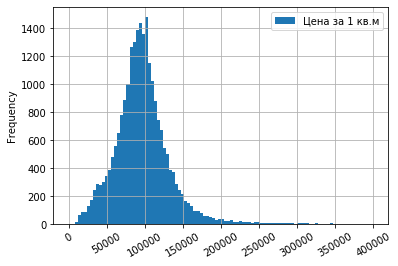

In [48]:
# распределение стоимости 1 кв. м
df['sqmeter_price'].plot(kind = 'hist', range = (0,400e3), bins = 100, label = 'Цена за 1 кв.м', legend=True, grid = True)
plt.xticks(rotation = 30, horizontalalignment = 'center')

df['sqmeter_price'].describe().round(2)

count    23565.00
mean        60.32
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

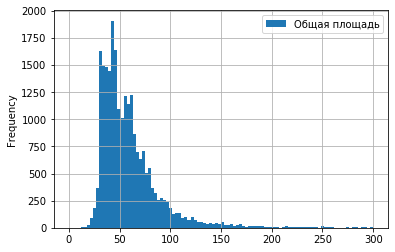

In [49]:
# распределение общей площади
df['total_area'].plot(kind = 'hist', range = (0,300), bins = 100, label = 'Общая площадь', legend=True, grid = True)
df['total_area'].describe().round(2)

count    23565.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

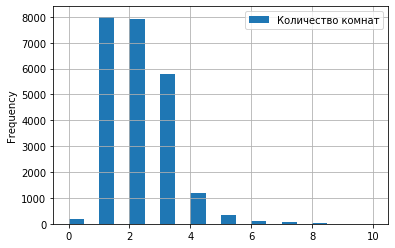

In [50]:
# распределение количества комнат
df['rooms'].plot(kind = 'hist', range = (0,10), bins = 20, label = 'Количество комнат', legend=True, grid = True)
df['rooms'].describe().round(2)

count    20394.00
mean       180.74
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        231.00
max       1580.00
Name: days_exposition, dtype: float64

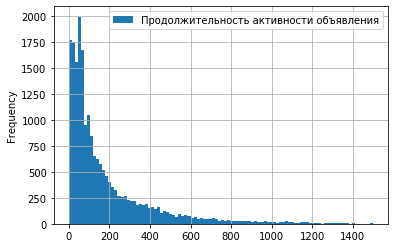

In [51]:
# распределение продолжительности активности объявления
df.query('days_exposition > 0')['days_exposition']\
    .plot(kind = 'hist', range = (0,1500), bins = 100, label = 'Продолжительность активности объявления',\
     legend=True, grid = True)
df.query('days_exposition > 0')['days_exposition'].describe().round(2)

Исходя из анализа графиков и характеристик распределения, типичные характеристики квартир:

- цена от 500.000 до 15.000.000
- цена за 1 кв.м от 30.000 до 200.000
- общая площадь от 30 до 130 кв.м
- количество комнат от 1 до 5

Если под длительностью процесса продажи подразумевать длительность активности объявления, то обычно процесс продажи длится от 1.5 месяцев (45 дней) до 1.5 лет (~550 дней). 

### 3.2 Нетипичные квартиры
Рассмотрим квартиры с необычными параметрами (цена > 100.000.000 или общая площадь > 500 кв.м)

In [52]:
df.query('last_price > 1e8 or total_area > 500').head()

,locality_name,rooms,sqmeter_price,last_price,total_area,living_area,kitchen_area,floor,floors_total,floor_type,ceiling_height,is_apartment,is_studio,is_open_plan,balcony,living_total_ratio,kitchen_total_ratio,total_images,days_exposition,weekday_of_exposition,month_of_exposition,year_of_exposition,first_day_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
789,Санкт-Петербург,4,4.354839e+05,135000000.0,310.0,250.0,50.0,2,5,другой,3.30,False,False,False,NaN,0.806452,0.161290,20,342.0,2,5,2018,2018-05-22,7251.0,34159.0,2.0,295.0,3.0,190.0
1022,Санкт-Петербург,5,5.000000e+05,155000000.0,310.0,190.0,63.0,3,3,последний,5.30,False,False,False,2.0,0.612903,0.203226,20,NaN,5,10,2018,2018-10-12,4785.0,24899.0,0.0,NaN,1.0,603.0
1183,Санкт-Петербург,6,4.060564e+05,118000000.0,290.6,188.7,22.0,3,6,другой,3.82,False,False,False,1.0,0.649346,0.075705,20,316.0,5,6,2018,2018-06-01,6224.0,25309.0,1.0,217.0,0.0,NaN
1295,Санкт-Петербург,5,4.285714e+05,120000000.0,280.0,162.0,30.0,3,4,другой,4.70,False,False,False,NaN,0.578571,0.107143,14,225.0,4,7,2018,2018-07-12,4247.0,24680.0,1.0,464.0,3.0,339.0
1431,Санкт-Петербург,3,1.736842e+06,330000000.0,190.0,95.0,40.0,5,7,другой,3.50,False,False,False,NaN,0.500000,0.210526,19,233.0,3,4,2018,2018-04-04,1197.0,23011.0,3.0,519.0,3.0,285.0


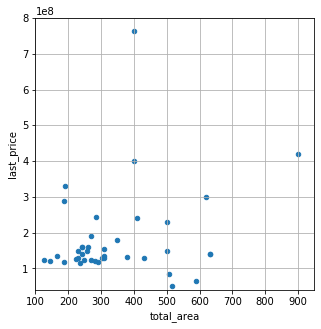

40

In [53]:
# диаграмма рассеяния "цена"-"общая площадь" для необычных квартир
df.query('last_price > 1e8 or total_area > 500')\
              .plot(x='total_area', xlim=(100,950),\
                    y='last_price', ylim=(4e7, 800e6),\
                    kind='scatter', figsize=(5, 5),\
                    grid=True)

plt.show() 

# количество нетипичных квартир
df.query('last_price > 1e8 or total_area > 500')['last_price'].count()

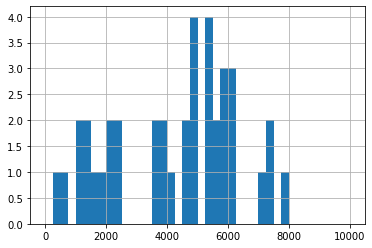

In [54]:
# распределение расстояния до центра города для необычных квартир
df.query('last_price > 1e8 or total_area > 500')\
  .query('cityCenters_nearest > 0')['cityCenters_nearest'].hist(bins = 40, range = (0,10e3))

plt.show() 

40 квартир, которые расположены недалеко от центра Санкт-Петерубрга. Это может объяснять их очень высокую цену.

---

Рассмотрим объявления без фотографий.

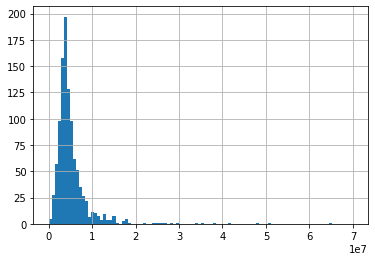

In [55]:
# распределение цен для объявлений без фотографий
df.query('total_images == 0')['last_price'].hist(bins = 100, range = (0,7e7))

plt.show() 

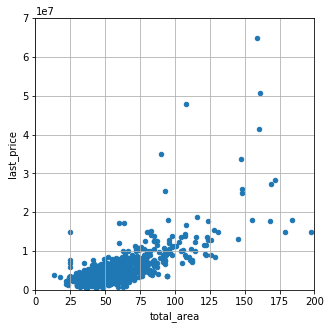

In [56]:
# диаграмма рассеяния "общая площадь"-"цена" для объявлений без фотографий
df.query('total_images == 0')\
  .plot(x='total_area', xlim=(0,200),\
        y='last_price', ylim=(0, 7e7),\
        kind='scatter', figsize=(5, 5),\
        grid=True)
plt.show() 

В наборе данных есть некоторое количество объявлений без фотографий, но с довольно большой ценой (до 65 млн), это необычно и такие объявления нужно рассматривать внимательнее.

### 3.3 Влияние отдельных факторов на цену
Рассчитаем коэффициенты корреляции для нескольких пар столбцов. Также, рассчитаем медианную цену квадратного метра с группировкой по разным характеристикам.

In [57]:
# коэффициенты корреляции со столбцом 'sqmeter_price' для разных столбцов
df[['last_price','rooms','total_area','living_area','kitchen_area', 
      'ceiling_height','floor','floors_total', 'sqmeter_price']].corr()['sqmeter_price']

last_price        0.736799
rooms             0.055680
total_area        0.302571
living_area       0.227499
kitchen_area      0.383172
ceiling_height    0.103193
floor             0.129203
floors_total      0.148423
sqmeter_price     1.000000
Name: sqmeter_price, dtype: float64

Линейная зависимость наиболее выражена для `last_price`-`sqmeter_price`. Чем больше цена всей квартиры, тем в среднем будет больше цена 1 кв. м (или наоборот). Связь цены 1 кв. м с другими параметрами носит нелинейный характер.

---

Рассмотрим влияние количества комнат на цену 1 кв. м жилья.

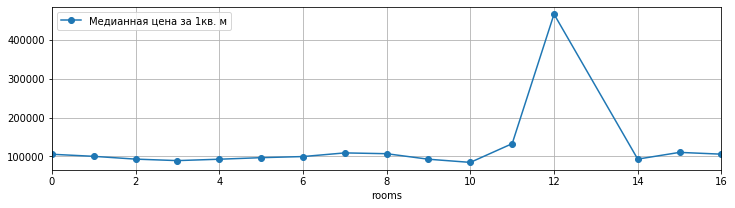

In [58]:
# построим график зависимости медианы цены за 1 кв. м от количества комнат
df.groupby('rooms')['sqmeter_price'].median()\
  .plot(grid=True, figsize=(12, 3), style ='o-', xlim = (0,16), 
        label = 'Медианная цена за 1кв. м')

plt.legend()
plt.show() 

In [59]:
# квартиры с количеством комнат больше 10
df[df['rooms'] > 10]

,locality_name,rooms,sqmeter_price,last_price,total_area,living_area,kitchen_area,floor,floors_total,floor_type,ceiling_height,is_apartment,is_studio,is_open_plan,balcony,living_total_ratio,kitchen_total_ratio,total_images,days_exposition,weekday_of_exposition,month_of_exposition,year_of_exposition,first_day_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
645,Санкт-Петербург,11,95264.017420,17500000.0,183.7,138.8,13.3,7,7,последний,3.40,False,False,False,NaN,0.755580,0.072401,3,NaN,7,7,2018,2018-07-01,3148.0,23606.0,0.0,NaN,0.0,NaN
862,Санкт-Петербург,14,68870.523416,25000000.0,363.0,222.0,16.6,4,5,другой,3.16,False,False,False,NaN,0.611570,0.045730,5,418.0,6,12,2017,2017-12-23,7950.0,38076.0,0.0,NaN,2.0,435.0
5330,Санкт-Петербург,15,110169.491525,65000000.0,590.0,409.0,100.0,3,6,другой,3.50,False,False,False,NaN,0.693220,0.169492,20,14.0,4,2,2019,2019-02-14,4666.0,24447.0,1.0,767.0,0.0,NaN
9642,Санкт-Петербург,11,170015.455951,33000000.0,194.1,129.0,11.9,2,5,другой,3.43,False,False,False,NaN,0.664606,0.061309,8,813.0,2,2,2017,2017-02-07,1015.0,21469.0,1.0,686.0,2.0,66.0
14414,Санкт-Петербург,19,86091.831287,32250000.0,374.6,264.5,27.6,2,5,другой,2.50,False,False,False,NaN,0.706086,0.073679,6,114.0,6,6,2018,2018-06-09,3574.0,19497.0,0.0,NaN,2.0,548.0
18744,Санкт-Петербург,16,105555.555556,28500000.0,270.0,180.0,13.0,4,4,последний,3.00,False,False,False,1.0,0.666667,0.048148,6,1365.0,1,3,2015,2015-03-02,4142.0,23575.0,1.0,516.0,0.0,NaN
19431,Санкт-Петербург,12,466666.666667,420000000.0,900.0,409.7,112.0,25,25,последний,2.80,False,False,False,NaN,0.455222,0.124444,8,106.0,3,12,2017,2017-12-06,7877.0,30706.0,0.0,NaN,2.0,318.0
20712,Санкт-Петербург,14,116784.841076,28659000.0,245.4,168.3,25.9,2,4,другой,2.50,False,False,False,0.0,0.685819,0.105542,6,95.0,4,3,2016,2016-03-31,2054.0,21104.0,3.0,541.0,2.0,118.0


Всего 8 квартир с очень большим (> 10) количеством комнат, исключим эти объявления из рассмотрения.

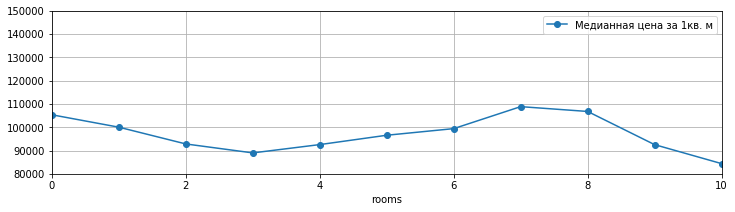

In [60]:
# изменим границы отображения и исключим 10+ комнатные квартиры
df.query('rooms < 11').groupby('rooms')['sqmeter_price'].median()\
  .plot(grid=True, figsize=(12, 3), style ='o-', ylim = (80e3,150e3), 
        label = 'Медианная цена за 1кв. м')

plt.legend()
plt.show() 

Цена 1 кв.м больше всего для квартир с 0, 7, 8 комнатами, а меньше всего для 3-х комнатных квартир. 0 комнат в этом случае, значит апартаменты/ студия/ свободная планировка.

---

Рассмотрим влияние категории этажа на стоимость 1 кв. м жилья.

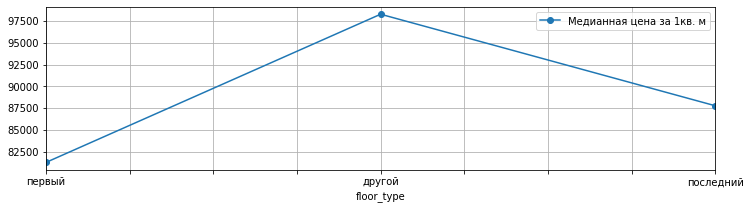

In [61]:
# построим график зависимости медианы цены за 1 кв. м от категории этажа
df.groupby('floor_type')['sqmeter_price'].median().reindex(['первый','другой','последний'])\
  .plot(grid=True, figsize=(12, 3), style ='o-', label = 'Медианная цена за 1кв. м')

plt.legend()
plt.show() 

Квартиры на 1-м этаже самые дешевые, на последнем дороже, но всё равно дешевле, чем на других этажах.

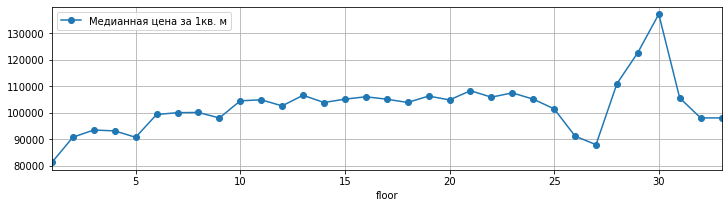

In [62]:
# построим график зависимости медианы цены за 1 кв. м от этажа
df.groupby('floor')['sqmeter_price'].median()\
  .plot(grid=True, figsize=(12, 3), style ='o-', label = 'Медианная цена за 1кв. м')

plt.legend()
plt.show() 

Цена 1 кв. м в зависимости от номера этажа меняется нелинейным образом, но до 21 этажа, в среднем увеличивается при увеличении этажа.

---

Рассмотрим, как влияет время размещения объявления на цену 1 кв. м жилья.

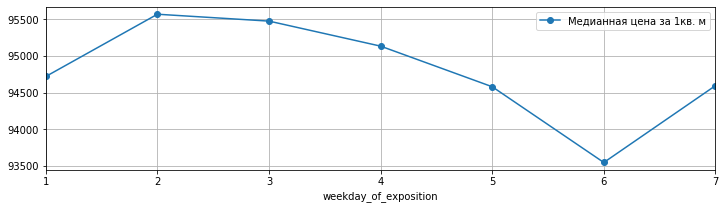

In [63]:
# построим график зависимости медианы цены за 1 кв. м от дня размещения объявления
df.groupby('weekday_of_exposition')['sqmeter_price'].median()\
  .plot(grid=True, figsize=(12, 3), style ='o-', label = 'Медианная цена за 1кв. м')

plt.legend()
plt.show() 

Разница в цене 1 кв. м не зависит от дня размещения объявления существенным образом (разница ~2000 при среднем в 94.500). Самая низкая цена в объявлениях, размещенных в субботу, самая высокая - во вторник.

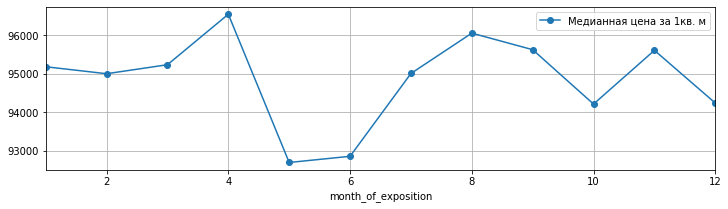

In [64]:
# построим график зависимости медианы цены за 1 кв. м от месяца размещения объявления
df.groupby('month_of_exposition')['sqmeter_price'].median()\
  .plot(grid=True, figsize=(12, 3), style ='o-', label = 'Медианная цена за 1кв. м')

plt.legend()
plt.show() 

Разница в цене 1 кв. м не зависит от месяца размещения объявления существенным образом (разница ~4000 при среднем в 94.500). Наименьшая стоимость указана в объявлениях, размещенных в мае и июне; самая высокая - в апреле и августе.

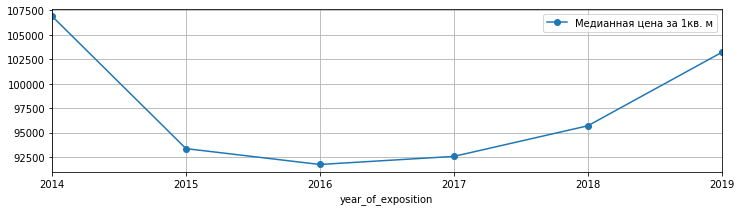

In [65]:
# построим график зависимости медианы цены за 1 кв. м от года размещения объявления
df.groupby('year_of_exposition')['sqmeter_price'].median()\
  .plot(grid=True, figsize=(12, 3), style ='o-', label = 'Медианная цена за 1кв. м')

plt.legend()
plt.show() 

В 2016 году стоимость квартир в объявлениях достигла минимума, с тех пор растет, но ещё не достигла уровня цен 2014 года.

---

Рассмотрим, как расстояние до центра Санкт-Петербурга влияет на цену 1 кв. м жилья.

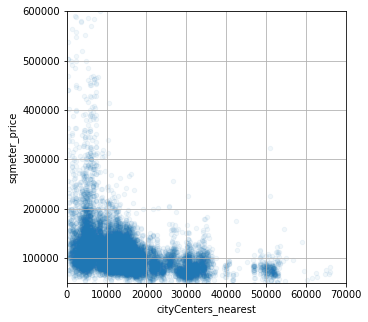

In [66]:
# построим диаграмму рассения для пар значений 'sqmeter_price'-'cityCenters_nearest'
df.query('cityCenters_nearest > 0')\
              .plot(x='cityCenters_nearest', xlim=(0,70e3),\
                    y='sqmeter_price', ylim=(50e3, 600e3),\
                    kind='scatter', figsize=(5, 5),\
                    grid=True, alpha = .06)

plt.show()

Цена за 1 кв. м ожидаемо уменьшается при увеличении расстояния от центра города. Выделяются несколько скоплений, скорее всего это пригороды Санкт-Петербурга. Проверим, построив гистограмму для столбца `cityCenters_nearest`.

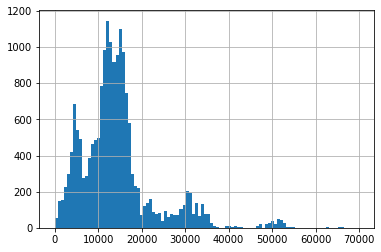

In [67]:
# распределение расстояний до центра города
df.query('cityCenters_nearest > 0')['cityCenters_nearest'].hist(bins = 100, range = (0,70e3))

plt.show()

Гистограмма для столбца `cityCenters_nearest` имеет всплески на тех же значениях, где скопления на диаграмме рассеяния (15.000 м, 22.000 м, 30.000 м, 52.000 м).

---

Расчитаем медианную цену 1 кв.м. для 10 пригородов Санкт-Петербурга с наибольшим кол-вом объявлений.

In [68]:
# выведем сводную таблицу с медианной ценой квартир и количеством объявлений в населенном пункте
df.pivot_table(index = 'locality_name', values = 'sqmeter_price', aggfunc = ['median','count'])\
  .sort_values(by = ('count','sqmeter_price'), ascending = False).head(11)

,median,count
,sqmeter_price,sqmeter_price
locality_name,,
Санкт-Петербург,104774.535809,15651
посёлок Мурино,85878.462169,520
посёлок Шушары,76829.268293,439
Всеволожск,65789.473684,398
Пушкин,100000.000000,369
Колпино,74723.748474,338
посёлок Парголово,91642.857143,327
Гатчина,67796.610169,307


В пригородах Санкт-Петербурга с наибольшим количеством объявлений медианная цена за 1 кв.м. изменяется от 58.000 (город Выборг) до 100.000 (город Пушкин).

---

Рассчитаем коэффициенты корреляции цены с основными факторами для двух групп объявлений: типовые (количество комнат <4 и общая площадь меньше 150 кв. м) квартиры в центре (расстояние до центра < 6.000 м) и вне центра (расстояние >= 6.000):

- выделим только столбцы с основными параметрами;
- выделим строки по фильтру расстояния до центра, числу комнат, площади.

Затем сравним с коэффициентами корреляции для всего набора данных.

In [69]:
# к. корреляции цены с основными параметрами для выборки типичных квартир в центре 
# кол-во записей в выборке 1.988
df.query('0 < cityCenters_nearest < 6000 and rooms < 4 and total_area < 150')\
    [['last_price','rooms','total_area','living_area','kitchen_area', 'floor']].corr()['last_price'].round(3)

last_price      1.000
rooms           0.282
total_area      0.627
living_area     0.460
kitchen_area    0.496
floor           0.146
Name: last_price, dtype: float64

In [70]:
# к. корреляции цены с основными параметрами для выборки типичных квартир вне центра
# кол-во записей в выборке 14.443
df.query('cityCenters_nearest >= 6000 and rooms < 4 and total_area < 150')\
    [['last_price','rooms','total_area','living_area','kitchen_area', 'floor']].corr()['last_price'].round(3)

last_price      1.000
rooms           0.409
total_area      0.736
living_area     0.588
kitchen_area    0.578
floor           0.091
Name: last_price, dtype: float64

In [71]:
# к. корреляции цены с основными параметрами для всего набора данных
df[['last_price','rooms','total_area','living_area','kitchen_area', 'floor']].corr()['last_price'].round(3)

last_price      1.000
rooms           0.363
total_area      0.654
living_area     0.583
kitchen_area    0.494
floor           0.027
Name: last_price, dtype: float64

К. корреляции небольшие для обеих групп, но в случае типовых квартир вне центра, самые большие коэффициенты корреляции между ценой и общей площадью и между ценой и площадью кухни.

### 3.4 Сравнение цен на апартаменты и обычные квартиры

Рассмотрим объявления с апартаментами, студиями, квартирами со свободной планировкой.

In [72]:
#выделим апартаменты в отдельный датасет
df_apart = df.query('is_apartment == True or is_studio == True or is_open_plan == True')

In [73]:
# количество объявлений
df_apart['total_area'].count()

263

Рассмотрим распределение характерных параметров для апартаментов на гистограммах.

count    2.630000e+02
mean     5.371459e+06
std      9.464524e+06
min      9.457500e+05
25%      2.380000e+06
50%      3.100000e+06
75%      4.000000e+06
max      8.400000e+07
Name: last_price, dtype: float64

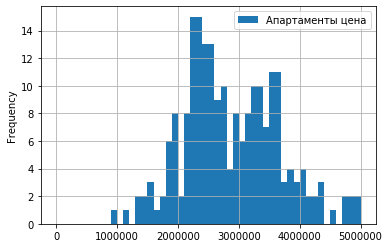

In [74]:
# гистограмма цен квартир
df_apart['last_price'].plot(kind = 'hist', range = (0,5e6), bins = 50, 
                             label = 'Апартаменты цена', legend=True, grid = True)

# числовые характеристики распределения цены квартиры
df_apart['last_price'].describe()

count       263.00
mean     116206.36
std       59358.91
min       34375.00
25%       90824.92
50%      106250.00
75%      127349.75
max      600000.00
Name: sqmeter_price, dtype: float64

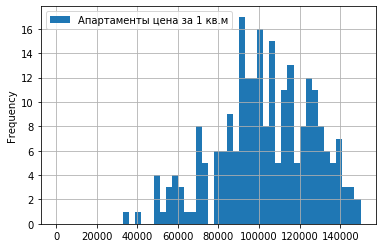

In [75]:
# распределение цены за 1 кв. м для апартаментов
df_apart['sqmeter_price'].plot(kind = 'hist', range = (0,150e3), bins = 50, 
                               label = 'Апартаменты цена за 1 кв.м', legend=True, grid = True)

df_apart['sqmeter_price'].describe().round(2)

count    263.0
mean      40.7
std       45.2
min       15.5
25%       25.0
50%       27.5
75%       33.5
max      507.0
Name: total_area, dtype: float64

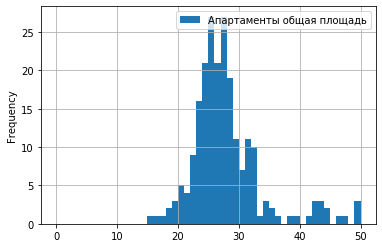

In [76]:
# распределение общей площади апартаментов
df_apart['total_area'].plot(kind = 'hist', range = (0,50), bins = 50, 
                            label = 'Апартаменты общая площадь', legend=True, grid = True)

df_apart['total_area'].describe().round(2)

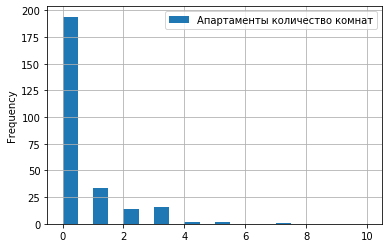

In [77]:
# распределение количества комнат для апартаментов
df_apart['rooms'].plot(kind = 'hist', range = (0,10), bins = 20, 
                       label = 'Апартаменты количество комнат', legend=True, grid = True)

plt.show()

count    263.00
mean       7.68
std        6.06
min        1.00
25%        3.00
50%        6.00
75%       11.00
max       26.00
Name: floor, dtype: float64

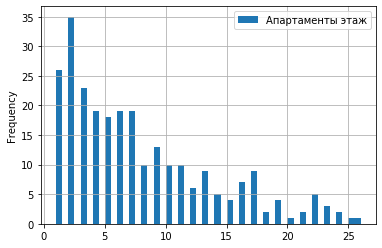

In [78]:
# распределение номера этажей для апартаментов
df_apart['floor'].plot(kind = 'hist', bins = 50, 
                       label = 'Апартаменты этаж', legend=True, grid = True)

df_apart['floor'].describe().round(2)

Исходя из анализа графиков и характеристик распределения, типичные характеристики апартаментов/студий:
- цена от 1.500.000 до 4.000.000;
- общая площадь от 20 до 35 кв.м ;
- количество комнат от 0 до 3 ;
- цена за 1 кв.м от 70.000 до 140.000.

---

Рассмотрим зависимость медианной цены 1 кв.м апартаментов от характеристик квартиры (кол-во комнат, категория этажа, этаж). Сравним с зависимостями для квартир типовой планировки.

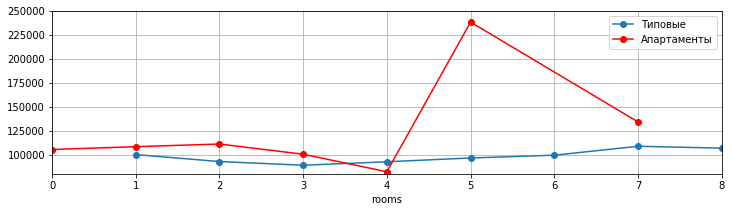

In [79]:
ax = plt.axes()

# график зависимости медианы цены за 1 кв. м типовых квартир от кол-во комнат
df.query('is_apartment == False and is_studio == False and is_open_plan == False')\
       .groupby('rooms')['sqmeter_price'].median()\
       .plot(grid=True,style ='o-', label = "Типовые", ax=ax, figsize=(12, 3))

# график зависимости медианы цены за 1 кв. м апартаментов от кол-ва комнат
df_apart.groupby('rooms')['sqmeter_price'].median()\
        .plot(grid=True, style ='ro-', ax = ax, label = 'Апартаменты',
              xlim = (0,8), ylim = (8e4,25e4))

plt.legend()
plt.show() 

1 кв. м в 4-х комнатных апартаментах стоит дешевле всего, а в 5-ти комнатных - дороже всего, разница ~в 4 раза. В целом, стоимость 1 кв.м в апартаментах выше.

---

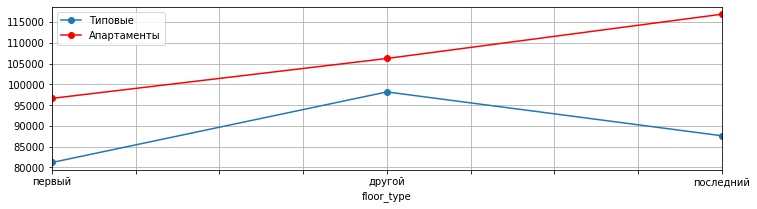

In [80]:
# график зависимости медианы цены за 1 кв. м типовых квартир от категории этажа
ax = df.query('is_apartment == False and is_studio == False and is_open_plan == False')\
    .groupby('floor_type')['sqmeter_price'].median().reindex(['первый','другой','последний'])\
    .plot(grid=True, figsize=(12, 3), style ='o-', label = 'Типовые')

# построим график зависимости медианы цены за 1 кв. м апартаментов от категории этажа
df_apart.groupby('floor_type')['sqmeter_price'].median().reindex(['первый','другой','последний'])\
    .plot(grid=True, figsize=(12, 3), style ='ro-', ax = ax, label = 'Апартаменты')

plt.legend()
plt.show() 

1 кв.м апартаментов и студий стоит больше, чем у типовых квартир для любой категории этажа.

---

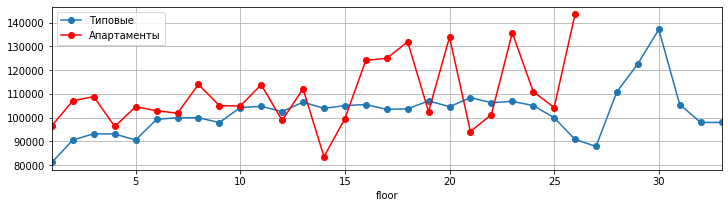

In [81]:
# график зависимости медианы цены за 1 кв. м типовых квартир от этажа
ax = df.query('is_apartment == False and is_studio == False and is_open_plan == False')\
    .groupby('floor')['sqmeter_price'].median()\
    .plot(grid=True, figsize=(12, 3), style ='o-', label = 'Типовые')

# построим график зависимости медианы цены за 1 кв. м апартаментов от этажа
df_apart.groupby('floor')['sqmeter_price'].median()\
    .plot(grid=True, figsize=(12, 3), style ='ro-', ax = ax, label = 'Апартаменты')

plt.legend()
plt.show() 

Завивисимость цены 1 кв.м от этажа носит нелинейный характер, но в целом, виден рост стоимости при увеличении этажа.

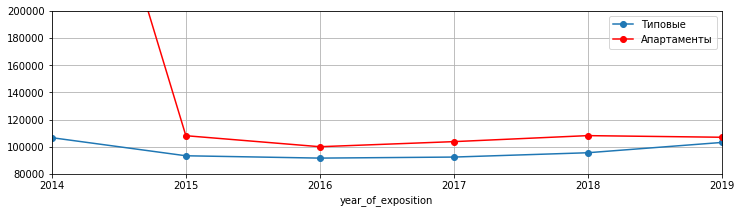

In [82]:
# график зависимости медианы цены за 1 кв. м типовых квартир от года размещения объявления
ax = df.query('is_apartment == False and is_studio == False and is_open_plan == False')\
    .groupby('year_of_exposition')['sqmeter_price'].median()\
    .plot(grid=True, figsize=(12, 3), style ='o-', label = 'Типовые')

# построим график зависимости медианы цены за 1 кв. м апартаментов от года размещения объявления
df_apart.groupby('year_of_exposition')['sqmeter_price'].median()\
    .plot(grid=True, figsize=(12, 3), style ='ro-', ax = ax, label = 'Апартаменты', ylim = (8e4,20e4))

plt.legend()
plt.show() 

Для обоих типов квартир наблюдается спад стоимости 1 кв. м в 2016 году, кроме того, видно сближение стоимости 1 кв.м для апартаментов/студий и типовых квартир в 2019 по сравнению с предыдущими годами.

## 4. Выводы

В ходе исследования определены типичные параметры всех квартир:
- цена от 500.000 до 15.000.000
- общая площадь от 30 до 130 кв.м
- количество комнат от 1 до 5
- цена за 1 кв.м от 30.000 до 200.000

и квартир со свободной планировкой (а также студий/ апартаментов):

- цена от 1.500.000 до 4.000.000;
- общая площадь от 20 до 35 кв.м ;
- количество комнат от 0 до 3 ;
- цена за 1 кв.м от 70.000 до 140.000.

В среднем объявление о продаже активно от 1.5 месяцев до 1.5 лет.

Квартиры на последних этажах в среднем дороже, чем на первых, но дешевле, чем на любых других.

Апартаменты/студии/квартиры со свободной планировкой в среднем дороже, чем квартиры с типовой планировкой, но в зависимости от этажа может быть и наоборот.